# Chapter 10: Optimizers

Once we have calculated the gradient, we can use this information to adjust weights and biases to decrease the measure of loss.

## 10.1. Stochastic Gradient Descent (SGD)

SGD is still a commonly used optimizer. Most optimizers are just variants of SGD.

<b>Stochastic Gradient Descent</b> is an optimizer that fits a single sample at a time.

<b>Batch Gradient Descent</b> is an optimizer that fits a whole dataset at once.

<b>Mini-batch Gradient Descent</b> is an optimizer that fits slices (batches) of a dataset.

Current naming trends and conventions with Stochastic Gradient Descent in use with deep learning today have merged and normalized all of these variants, such that a batch of data can be a single sample, every sample in a dataset, or some subset of the full dataset at a time.


-3.0
-3.0 2.0 6.0
6.0
6.0
1.0
1.0
1.0 1.0 1.0 1.0
-3.0 1.0 -1.0 -2.0 2.0 3.0
[-3.0, -1.0, 2.0] 1.0
[-3.001, -0.998, 1.997] 0.999
5.985
[[ 0.44  0.44  0.44]
 [-0.38 -0.38 -0.38]
 [-0.07 -0.07 -0.07]
 [ 1.37  1.37  1.37]]
[ 0.44 -0.38 -0.07  1.37]
[[ 0.44 -0.38 -0.07  0.5 ]
 [ 0.88 -0.76 -0.14  1.  ]
 [ 1.32 -1.14 -0.21  1.5 ]]
[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]
[[6. 6. 6.]]
[[1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]
[[ 0.179515   0.5003665 -0.262746 ]
 [ 0.742093  -0.9152577 -0.2758402]
 [-0.510153   0.2529017  0.1629592]
 [ 0.971328  -0.5021842  0.8636583]]
[[1.98489  2.997739 0.497389]]
[[ 0.21 -0.07 -0.14]
 [-0.07  0.09 -0.02]
 [-0.14 -0.02  0.16]]
Gradients: combined loss and activation:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
Gradients: separate loss and activation:
[[-0.09999999  0.033

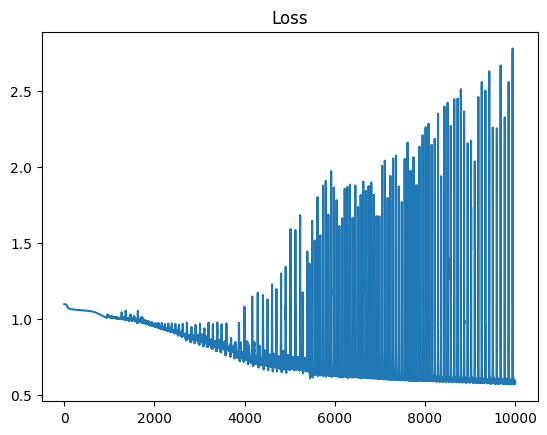

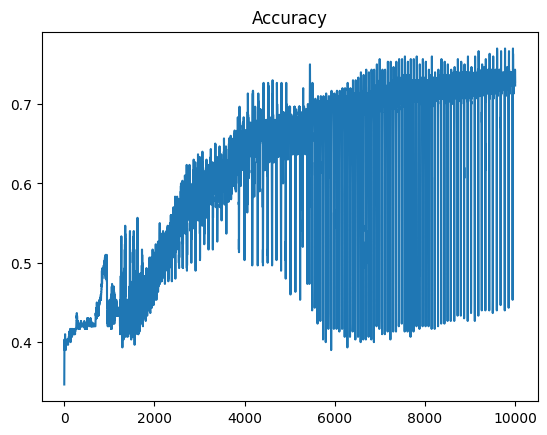

In [1]:
# To use all class, functions defined in another notebook:
%run 9_backpropagation.ipynb

class Optimizer_SGD:
    # Initialization method will take hyper-parameters, starting with learning_rate with default value of 1.
    def __init__ (self, learning_rate = 1.0):
        self.learning_rate = learning_rate      # storing hyper-parameters in the class' properties

    # Update parameters
    def update_params (self, layer):    # layer object contains its parameters (weights and biases) and also, at this stage, the gradient that is calculated during backpropagation
        layer.weights += - self.learning_rate * layer.dweights
        layer.biases += - self.learning_rate * layer.dbiases

        
# Create dataset
X, y = spiral_data(samples = 100, classes = 3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create an optimizer object
optimizer = Optimizer_SGD()

# Train in loop

losses = []
accuracies = []

for epoch in range(10001):
    # --------------------- A forward pass --------------------------
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function, takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer, takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function, takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    losses.append(loss)
    
    # Calculate accuracy from output of activation2 and targets, calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis = 1)

    if len(y.shape) == 2 :
        y = np.argmax(y, axis = 1)
    accuracy = np.mean(predictions == y)
    accuracies.append(accuracy)
    
    if not epoch%100:
        print(f'epoch: {epoch} , acc: {accuracy :.3f} , loss: {loss :.3f}')

    # --------------------- A backward pass (backpropagation) --------------------------
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # --------------------- Use optimizer to update weights and biases --------------------------
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

    
import matplotlib.pyplot as plt
plt.plot(range(10001), losses)
plt.title('Loss')
plt.show()
plt.plot(range(10001), accuracies)
plt.title('Accuracy')
plt.show()

Our neural network stays stuck around a loss of 1 and accuracy around 0.7.

The later part fluctuates trongly, this means the learning rate is too high, that causes the model to get stuck in a local minumum.

Iterating over more epochs does not seem helpful at this point, this means we're likely stuck with our optimization.

The learning rate (LR) is the primary adjustable parameter for the optimizer as it decreases loss.

To gain an intuition for adjusting, planning, or initially setting the learning rate, we should first understand how the learning rate affects the optimizer and output of the loss function.

## 10.2. Learning Rate

